In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import warnings
import scipy.stats as stats
#import geopandas as geop
#import xgboost as xgb
#import cartopy
import hashlib
from timeit import timeit
import pickle
import category_encoders as ce


#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet, LassoLarsIC, Lasso, BayesianRidge, Ridge, LassoLars, LassoLarsCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, Imputer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, ParameterSampler, StratifiedShuffleSplit

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer

warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('train.csv', low_memory=False, parse_dates=["fecha"])

In [7]:
df_nd = df_raw.drop_duplicates('titulo')

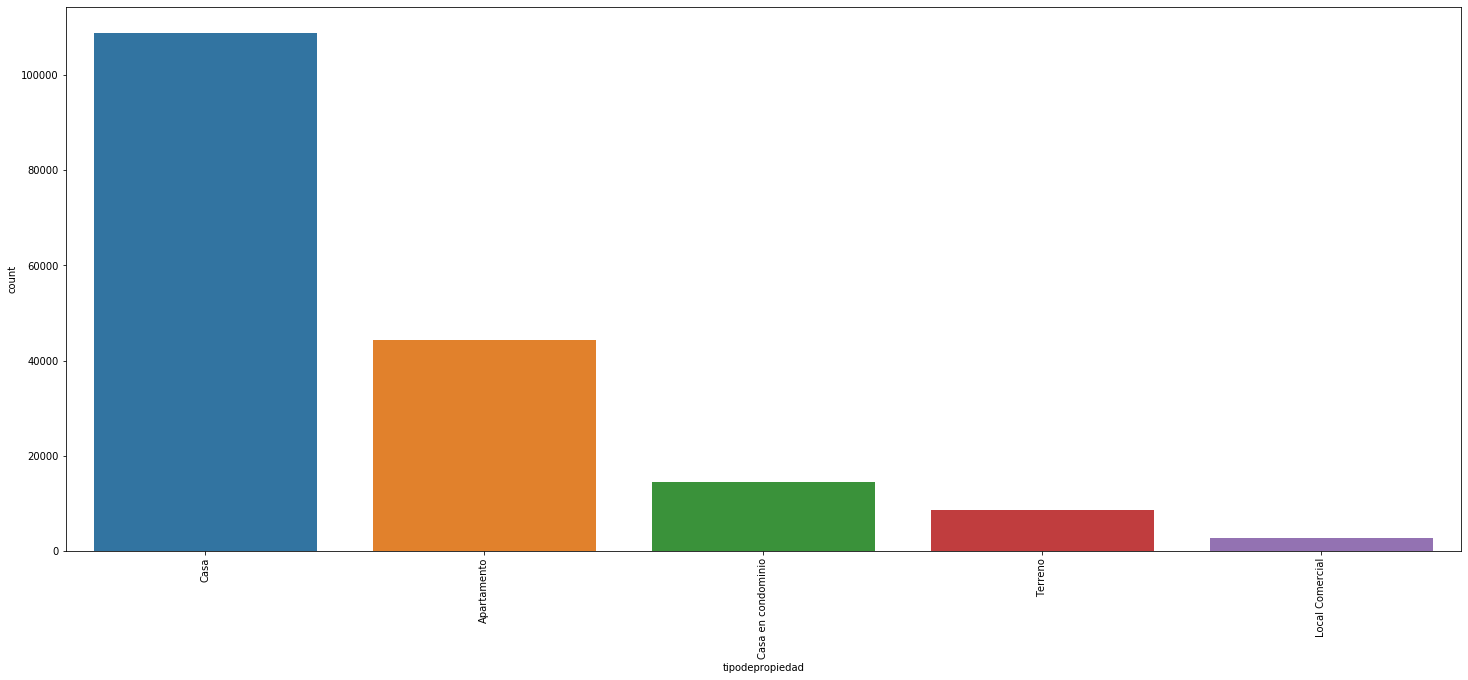

In [8]:
tipo_df = df_nd.groupby('tipodepropiedad').filter(lambda x: len(x) > 1500)
tipode = tipo_df['tipodepropiedad'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = tipo_df['tipodepropiedad'], order = tipode, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [31]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'<','>']
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = tipo_df['titulo'].dropna().values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [30]:
word_features = vectorizer.vocabulary_

In [33]:
stemmer = SnowballStemmer('spanish')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [34]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
word_features2[:50]

["''",
 "''barrag",
 "''bosqu",
 "''cas",
 "''esenci",
 "''gran",
 "''hermos",
 "''lom",
 "''los",
 "''ram",
 "''vall",
 "'c'",
 "'excelent",
 "'los",
 "'m",
 "'mx",
 "'pase",
 "'rec",
 "'urgente'",
 'aa',
 'aaa',
 'aaaaaa',
 'aab',
 'aacut',
 'aaeropuert',
 'aagm',
 'aah',
 'aak',
 'aalmed',
 'aar',
 'aaragoz',
 'aaron',
 'aaventur',
 'ab',
 'abac',
 'abad',
 'abadej',
 'abadi',
 'abaj',
 'aban',
 'abarrot',
 'abas',
 'abasol',
 'abast',
 'abastec',
 'abbacc',
 'abc',
 'abcd',
 'abdi',
 'abedel']

In [35]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

In [38]:
kmeans = KMeans(n_clusters = 15, n_init = 5, n_jobs = -1)
kmeans.fit(X3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=5, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [39]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : par, list, estren, cas, remodel, en, ideal, excelent, habit, departament
1 : vill, en, cas, vent, del, la, las, bonit, departament, fracc
2 : excelent, en, ubicaci, n, cas, departament, ubicacion, oportun, vent, y
3 : residencial, en, cas, vent, departament, la, el, hermos, col, priv
4 : departament, en, vent, col, n, nuev, hermos, bonit, m, polanc
5 : lom, en, cas, vent, angelopolis, verd, departament, del, la, polis
6 : en, cas, vent, condomini, el, fraccion, col, n, hermos, fracc
7 : terren, en, vent, m, lot, residencial, la, excelent, del, san
8 : la, en, cas, vent, departament, coloni, col, ciud, herradur, hermos
9 : vend, se, en, cas, departament, bonit, col, la, del, hermos
10 : cas, en, hermos, vent, y, n, nuev, recam, resident, priv
11 : san, en, cas, vent, pedr, departament, jos, miguel, juan, mate
12 : del, vall, en, cas, vent, bosqu, departament, lag, sol, col
13 : remat, bancari, hipotecari, en, cas, departament, oportun, col, excelent, la
14 : av, en, departament, cas

In [59]:
desc['cluster'] = np.int(kmeans.labels_)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'vectorize'

In [60]:
kmeans.labels_

array([10,  6, 10, ..., 12, 10, 14])